In [1]:
import pandas as pd
import numpy as np
import sklearn
import random
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
import scipy.optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
credit_card = pd.read_csv('/Users/douglasflorencio/Documents/tg2/creditcard.csv')

In [3]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Charts

In [4]:
def plot_roc(test, pred):
    fpr, tpr, thresholds = roc_curve(test.values.ravel(),pred)
    roc_auc = auc(fpr,tpr)
    
    plt.title('curva ROC')
    plt.plot(fpr, tpr, 'b',label='area sobre a curva  = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.01,1.0])
    plt.ylim([-0.01,1.0])
    plt.ylabel('Verdadeiro positivo')
    plt.xlabel('Falso positivo')
    plt.show()

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Tabela de contingencia',
                          cmap=plt.cm.Greens):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black" )

    plt.tight_layout()
    plt.ylabel('Valor verdadeiro')
    plt.xlabel('Valor previsto')
    plt.show()

#### Samples

fraud = credit_card[credit_card['Class']==1]
legit = credit_card[credit_card['Class']==0]

#### train 70% legit, 50% fraud / validation 15% legit / test 15%legit 50%fraud

from sklearn.model_selection import train_test_split

train_fraud,test_fraud = train_test_split(fraud,test_size=0.50)
train_legit,aux_legit = train_test_split(legit,test_size=0.30)

improve_legit = aux_legit[0:len(aux_legit)/2]
test_legit = aux_legit[len(aux_legit)/2 : len(aux_legit)]

credit_card_x = credit_card.ix[:,range(30)]
credit_card_y = credit_card.ix[:,30]

train = train_fraud.append(train_legit).sample(frac = 1, replace=False)
validation = improve_legit.sample(frac = 1, replace=False)
test = test_legit.append(test_fraud).sample(frac= 1, replace=False)

train.to_csv('tgtrain2.csv')
validation.to_csv('tgvalidation2.csv')
test.to_csv('tgtest2.csv')

In [23]:
train = pd.read_csv('/users/douglasflorencio/Documents/tg2/tgtrain.csv')
validation = pd.read_csv('/users/douglasflorencio/Documents/tg2/tgvalidation.csv')
test = pd.read_csv('/users/douglasflorencio/Documents/tg2/tgtest.csv')

In [24]:
train = train.drop(['Unnamed: 0'],axis=1)
validation = validation.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)

In [48]:
train_legit = train[train['Class']==0]
train_fraud = train[train['Class']==1]

In [25]:
train_x = train.ix[:,range(30)]
train_y = train.ix[:,30]
validation_x = validation.ix[:,range(30)]
validation_y = validation.ix[:,30]
test_x = test.ix[:,range(30)]
test_y = test.ix[:,30]

/Users/douglasflorencio/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/douglasflorencio/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/douglasflorencio/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


#### Decision tree

In [30]:
dt = DecisionTreeClassifier().fit(train_x,train_y)

predicted = dt.predict(test_x)

import pydotplus 
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("cc.pdf") 

In [31]:
print(classification_report(test_y, predicted))
print confusion_matrix(test_y, predicted)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.92      0.74      0.82       246

avg / total       1.00      1.00      1.00     42894

[[42632    16]
 [   65   181]]


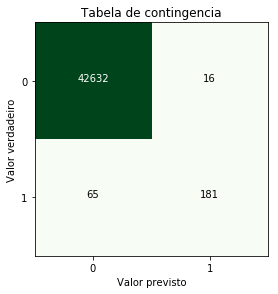

In [32]:
plot_confusion_matrix(confusion_matrix(test_y,predicted),['0','1'])

In [33]:
y_pred_tree = dt.predict_proba(test_x)[:, 1]

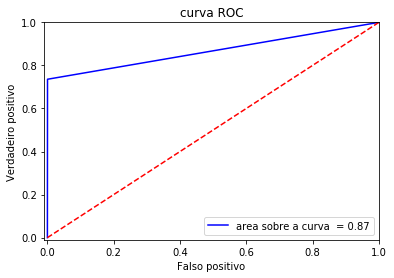

In [34]:
plot_roc(test_y,y_pred_tree)

#### Random forest

In [35]:
#### Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_x,train_y)
pred = rfc.predict(test_x) 

In [36]:
print(classification_report(test_y,pred))
print confusion_matrix(test_y, pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.99      0.71      0.82       246

avg / total       1.00      1.00      1.00     42894

[[42646     2]
 [   72   174]]


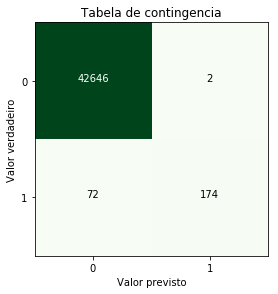

In [37]:
plot_confusion_matrix(confusion_matrix(test_y,pred),['0','1'])

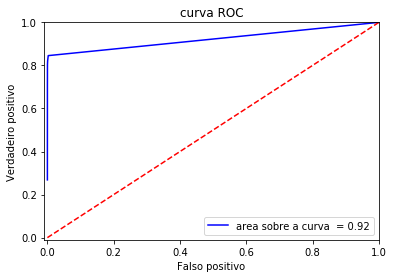

In [38]:
y_pred = rfc.predict_proba(test_x)[:, 1]
plot_roc(test_y,y_pred)

In [ ]:
#### feature importance

In [60]:
importances_rfc = rfc.feature_importances_
indices_rfc = np.argsort(importances_rfc)[::-1]
indices1_rfc = train_x.columns[indices_rfc].values

std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

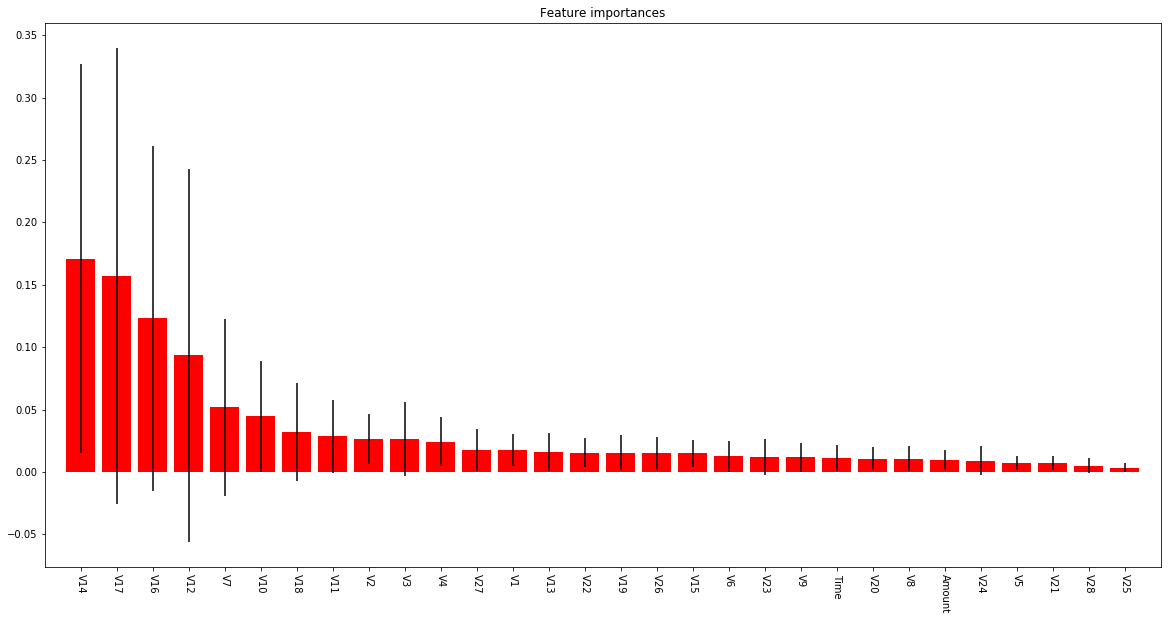

In [62]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances_rfc[indices_rfc],
       yerr=std[indices_rfc],color="r", align="center")
plt.xticks(range(train_x.shape[1]), indices1_rfc, rotation=270)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [65]:
corr_matrix = train_x.corr().abs()


os = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [67]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

V2    Amount    0.532294
Time  V3        0.425791
V7    Amount    0.406699
V5    Amount    0.390864
V20   Amount    0.335684
Time  V11       0.246189
      V25       0.231530
V1    Amount    0.226894
V6    Amount    0.219224
V3    Amount    0.214072
Time  V15       0.183865
      V5        0.171917
      V22       0.143122
      V12       0.123166
      V1        0.117528
V21   Amount    0.106743
Time  V4        0.104320
V8    Amount    0.104065
V23   Amount    0.102249
V10   Amount    0.101939
Time  V14       0.101203
V4    Amount    0.098588
Time  V18       0.091703
      V7        0.083864
      V17       0.077320
      V13       0.064638
V22   Amount    0.063080
Time  V6        0.062484
V19   Amount    0.057484
Time  V23       0.050720
                  ...   
V17   V23       0.000365
V3    V24       0.000334
V13   V27       0.000324
      V16       0.000300
V18   V24       0.000287
V1    V13       0.000275
V16   V26       0.000272
V15   V24       0.000261
V23   V27       0.000248


In [70]:
train_x.columns

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount'],
      dtype='object')

In [ ]:
######

In [84]:
r_train_x = train_x[['Time','V4','V8','V9','V10','V12','V13','V14','V15','V16','V17',
                   'V18','V19','V21','V22','V23','V24','V26','V27','V28','Amount']]

r_test_x = test_x[['Time','V4','V8','V9','V10','V12','V13','V14','V15','V16','V17',
                   'V18','V19','V21','V22','V23','V24','V26','V27','V28','Amount']]

In [98]:
rfc2 = RandomForestClassifier()
rfc2.fit(r_train_x,train_y)
pred2 = rfc2.predict(r_test_x) 

In [99]:
print(classification_report(test_y,pred2))
print confusion_matrix(test_y, pred2)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.98      0.71      0.82       246

avg / total       1.00      1.00      1.00     42894

[[42645     3]
 [   72   174]]


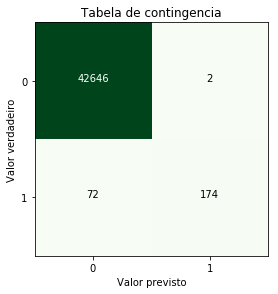

In [100]:
plot_confusion_matrix(confusion_matrix(test_y,pred),['0','1'])

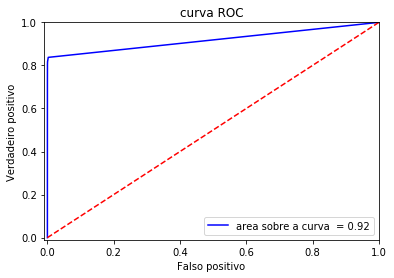

In [101]:
y_pred2 = rfc2.predict_proba(r_test_x)[:, 1]
plot_roc(test_y,y_pred2)

In [109]:
importances_rfc2 = rfc2.feature_importances_
indices_rfc2 = np.argsort(importances_rfc2)[::-1]
indices1_rfc2 = r_train_x.columns[indices_rfc2].values

std2 = np.std([tree.feature_importances_ for tree in rfc2.estimators_],axis=0)

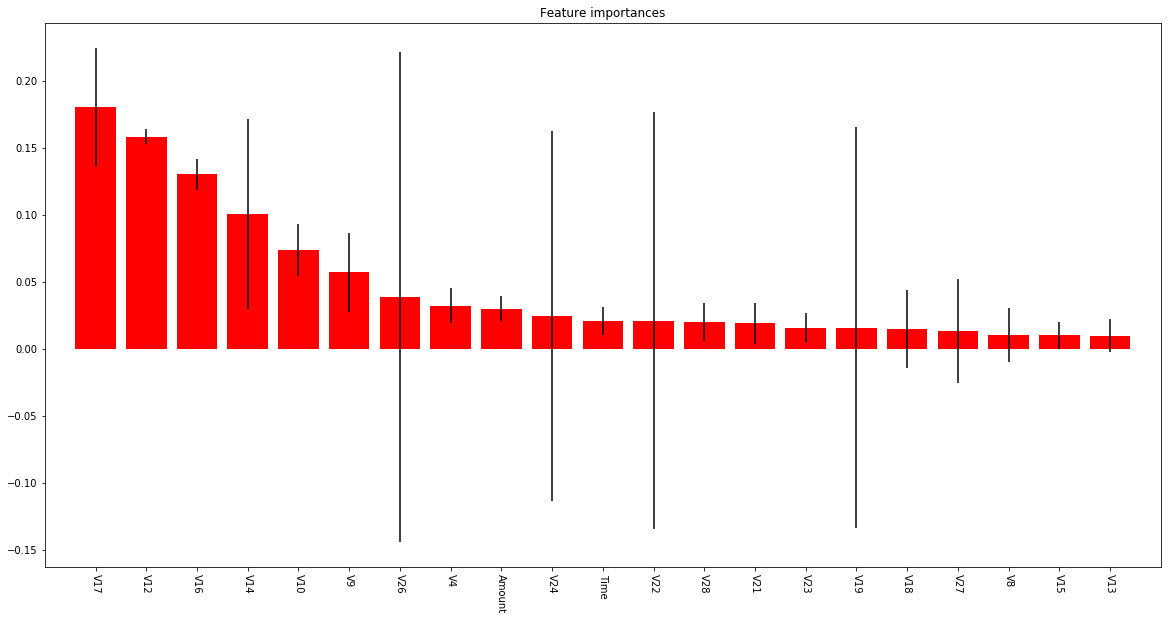

In [111]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(r_train_x.shape[1]), importances_rfc2[indices_rfc2],
       yerr=std[indices_rfc2],color="r", align="center")
plt.xticks(range(r_train_x.shape[1]), indices1_rfc2, rotation=270)
plt.xlim([-1, r_train_x.shape[1]])
plt.show()

#### Logistic regression

In [39]:
lrmodel = LogisticRegression()
lrmodel.fit(train_x, train_y)
pred_y = lrmodel.predict(test_x)


print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

[[42634    14]
 [  117   129]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.90      0.52      0.66       246

avg / total       1.00      1.00      1.00     42894



In [40]:
lrmodel.intercept_

array([-0.88766959])

In [41]:
lrmodel.coef_

array([[ -9.24111810e-05,   1.59202835e-01,  -3.71144345e-01,
         -7.44709097e-01,   1.18776787e-01,  -4.81491563e-02,
         -5.64336027e-02,   2.60277919e-02,  -1.05974124e-01,
         -3.68956515e-01,  -1.77209114e-01,  -1.69581532e-01,
          1.41265546e-02,  -2.54842450e-01,  -6.53043720e-01,
         -1.89440882e-01,  -2.34264010e-01,  -3.94936535e-01,
         -5.16500171e-03,   5.99906843e-02,   2.94996059e-02,
          1.41386436e-01,   1.71666689e-01,   3.51766451e-02,
         -2.20064236e-02,  -1.51503950e-01,   2.03895233e-02,
         -6.18013386e-02,   2.41454790e-02,  -1.05978602e-02]])

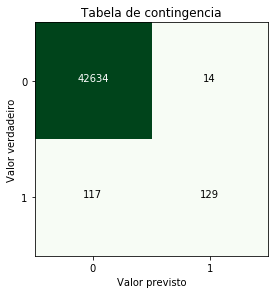

In [42]:
plot_confusion_matrix(confusion_matrix(test_y,pred_y),['0','1'])

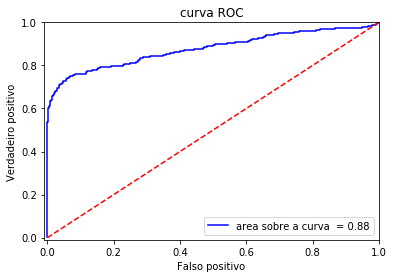

In [43]:
y_predprob = lrmodel.predict_proba(test_x)[:, 1]
plot_roc(test_y,y_predprob)

#### Undersample

In [49]:
train_legit_under = train_legit.sample(9*len(train_fraud))

In [50]:
train_under = train_fraud.append(train_legit_under)
train_under = train_under.sample(frac=1)

In [51]:
u_train_x = train_under.ix[:,range(30)]
u_train_y = train_under.ix[:,30]

/Users/douglasflorencio/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


[[42500   148]
 [   58   188]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.56      0.76      0.65       246

avg / total       1.00      1.00      1.00     42894



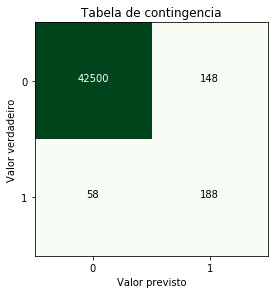

In [52]:
### logistic regression
u_lrmodel = LogisticRegression(C=1)
u_lrmodel.fit(u_train_x, u_train_y)
u_pred_y = u_lrmodel.predict(test_x)


print(confusion_matrix(test_y, u_pred_y))
print(classification_report(test_y, u_pred_y))


u_fpr, u_tpr, u_thresholds = roc_curve(test_y.values.ravel(),u_pred_y)


# Plot da curva  ROC
plot_confusion_matrix(confusion_matrix(test_y,u_pred_y),['0','1'])


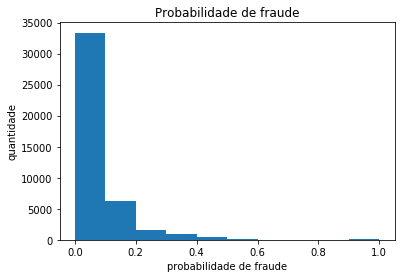

In [53]:
y_predprob_u = u_lrmodel.predict_proba(test_x)[:, 1] 
plt.hist(y_predprob_u, bins=10)
plt.xlabel('probabilidade de fraude')
plt.ylabel('quantidade')
plt.title('Probabilidade de fraude') 
plt.show()

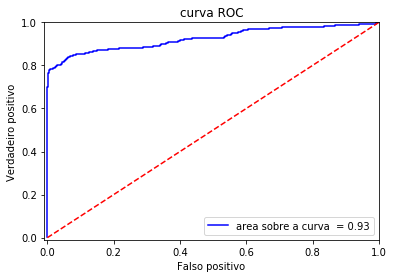

In [54]:
plot_roc(test_y,y_predprob_u)

#### Oversample

In [55]:
train_fraud_over = train_fraud.sample(10*len(train_fraud),replace='True')

In [56]:
train_over = train_fraud_over.append(train_legit)
train_over = train_over.sample(frac=1)

In [57]:
o_train_x = train_over.ix[:,range(30)]
o_train_y = train_over.ix[:,30]

/Users/douglasflorencio/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


[[42595    53]
 [   90   156]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.75      0.63      0.69       246

avg / total       1.00      1.00      1.00     42894



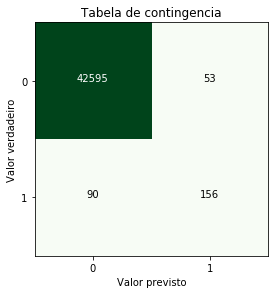

In [58]:
### logistic regression
o_lrmodel = LogisticRegression(C=1)
o_lrmodel.fit(o_train_x, o_train_y)
o_pred_y = o_lrmodel.predict(test_x)

print(confusion_matrix(test_y, o_pred_y))
print(classification_report(test_y, o_pred_y))


o_fpr, o_tpr, o_thresholds = roc_curve(test_y.values.ravel(),o_pred_y)


plot_confusion_matrix(confusion_matrix(test_y,o_pred_y),['0','1'])

#plot_roc(o_test_y,o_pred_y)

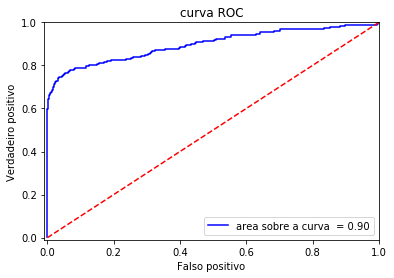

In [59]:
y_predprob_o = o_lrmodel.predict_proba(test_x)[:, 1]
plot_roc(test_y,y_predprob_o)

In [ ]:
#### Normalizar base e logit


In [113]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [114]:
scaler = StandardScaler().fit(train_x)
#scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(15.0, 85.0), copy=True).fit(train_x)

In [115]:
n_train_x = scaler.transform(train_x)
n_test_x = scaler.transform(test_x)

In [125]:
logit = LogisticRegression()
logit.fit(n_train_x,train_y)
pred4 = logit.predict(n_test_x)
pred_p4 = logit.predict_proba(n_test_x)[:, 1]

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.93      0.56      0.70       246

avg / total       1.00      1.00      1.00     42894



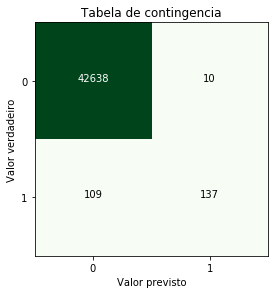

In [126]:
print(classification_report(test_y,pred4))

plot_confusion_matrix(confusion_matrix(test_y,pred4),['0','1'])

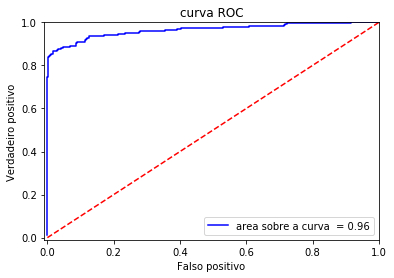

In [127]:
plot_roc(test_y,pred_p4)

In [150]:
coeficients = pd.DataFrame(logit.coef_, columns=train_x.columns)

In [169]:
coeficients = coeficients.round(2)

In [173]:
pd.set_option('display.max_columns', None)

In [174]:
coeficients

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.07,0.08,0.01,-0.11,0.87,0.11,-0.13,-0.01,-0.19,-0.23,-0.79,-0.1,0.12,-0.4,-0.59,-0.07,0.01,0.01,-0.11,0.21,-0.2,0.31,0.39,0.01,0.13,-0.13,-0.02,-0.31,-0.12,0.07


In [147]:
train_x.columns

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount'],
      dtype='object')

In [141]:
logit.coef_

array([[-0.070603  ,  0.0811545 ,  0.0132518 , -0.11310404,  0.86808457,
         0.10724814, -0.12782856, -0.01417347, -0.19340383, -0.23013132,
        -0.78971462, -0.10240946,  0.123489  , -0.39559578, -0.59200075,
        -0.06678004,  0.00603322,  0.01494977, -0.10908681,  0.20558027,
        -0.20212587,  0.31397558,  0.39361643,  0.0090718 ,  0.12934256,
        -0.13110727, -0.01982565, -0.31341187, -0.11706261,  0.07497671]])

In [139]:
indices = np.ravel(np.argsort(abs(logit.coef_)))[::-1]
indices_names = train_x.columns[indices].values
indices_names

array(['V4', 'V10', 'V14', 'V13', 'V22', 'V21', 'V27', 'V9', 'V19', 'V20',
       'V8', 'V25', 'V24', 'V6', 'V12', 'V28', 'V3', 'V18', 'V5', 'V11',
       'V1', 'Amount', 'Time', 'V15', 'V26', 'V17', 'V7', 'V2', 'V23',
       'V16'], dtype=object)

In [ ]:
##### excluindo features

In [175]:
r_train_x = train_x[['V1','V3','V4','V5','V6','V8','V9','V10','V11','V12','V13','V14',
                   'V18','V19','V20','V21','V22','V24','V25','V27','V28']]

r_test_x = test_x[['V1','V3','V4','V5','V6','V8','V9','V10','V11','V12','V13','V14',
                   'V18','V19','V20','V21','V22','V24','V25','V27','V28']]


In [177]:
lrmodel3 = LogisticRegression()
lrmodel3.fit(r_train_x, train_y)
pred_y3 = lrmodel3.predict(r_test_x)


print(confusion_matrix(test_y, pred_y3))
print(classification_report(test_y, pred_y3))

[[42638    10]
 [  108   138]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     42648
          1       0.93      0.56      0.70       246

avg / total       1.00      1.00      1.00     42894



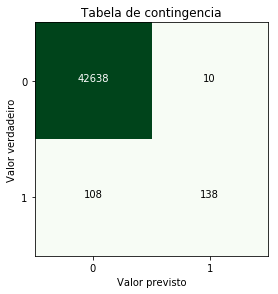

In [179]:
plot_confusion_matrix(confusion_matrix(test_y,pred_y3),['0','1'])

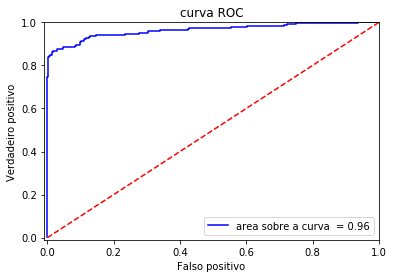

In [180]:
y_predprob3 = lrmodel3.predict_proba(r_test_x)[:, 1]
plot_roc(test_y,y_predprob3)